In Time-Series analysis we only have one-dimentional data. Therefore, autocorrelation measures the correlation od the data with itself after being shifted a certain number of units. An intuitive way to think about this is 'How correlated is today's data woth yestrday's data and so on?'. This can help us determine seasonlity, trend or any other patterns in data if present.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
import statsmodels.api as sm

In [4]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [5]:
# import non-stationary data
df_ns = pd.read_csv('Data/airline_passengers.csv', index_col = 'Month', parse_dates = True)
df_ns.index.freq = 'MS'
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
df_s = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col = 'Date', parse_dates = True)
df_s.index.freq = 'D'
df_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [7]:
df_ns.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df_s.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [9]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Autocorrelation

In [10]:
df = pd.DataFrame({'a':[13,5,11,12,19]})
df

,a
0,13
1,5
2,11
3,12
4,19


In [11]:
# autocorrelation array
acf(df['a'])

array([ 1.  ,  0.  , -0.08, -0.49,  0.07])

In [12]:
# partial autocorrelation yw = yule walker method
pacf_yw(df.a, nlags = 4, method = 'mle')

array([ 1.        ,  0.        , -0.08      , -0.4931562 ,  0.05887103])

In [13]:
pacf_ols(df.a, nlags = 4)

array([ 1.        , -0.04516129,  0.93181818, -0.08068845,  0.53695652])

### Plotting

In [14]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

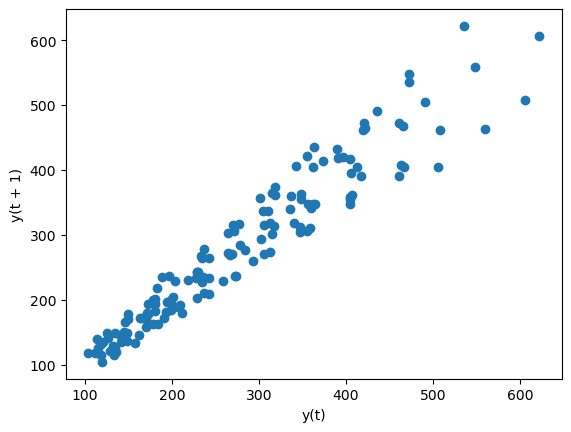

In [15]:
lag_plot(df_ns['Thousands of Passengers'])
# strong autocorrelation

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

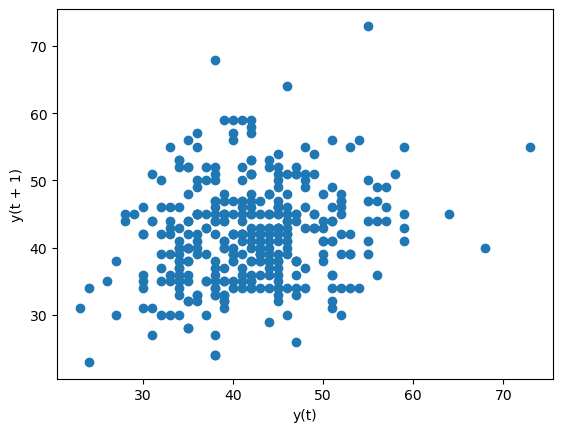

In [17]:
lag_plot(df_s['Births'])
# weak autoorrelation

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: xlabel='Month'>

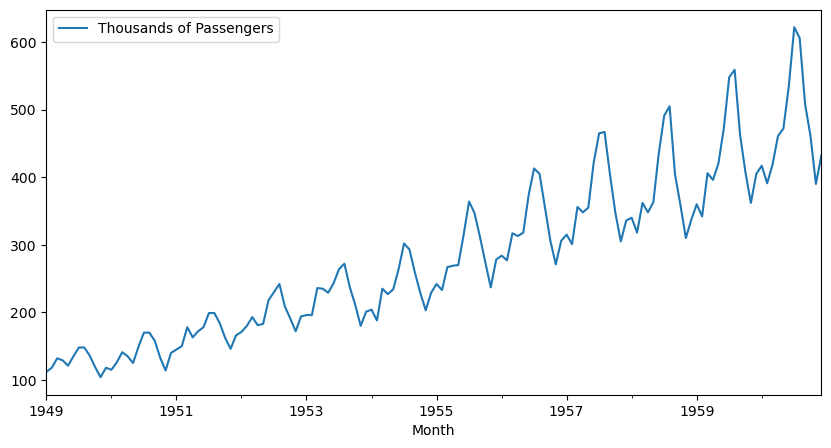

In [23]:
df_ns.plot(figsize = (10, 5))

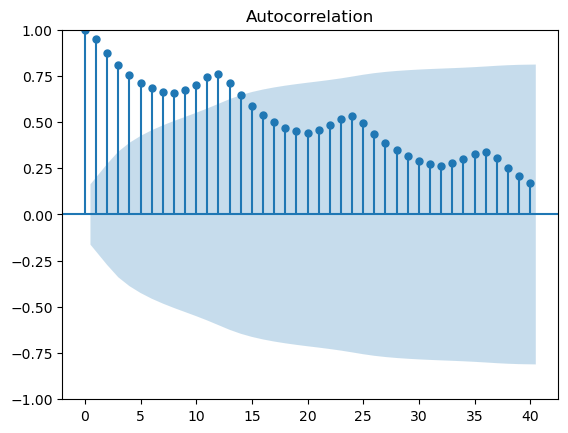

In [25]:
plot_acf(df_ns, lags = 40);

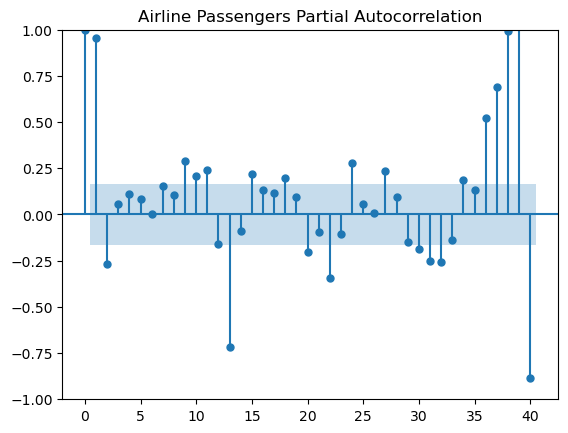

In [32]:
plot_pacf(df_ns, lags = 40, title = "Airline Passengers Partial Autocorrelation");

<Axes: xlabel='Date'>

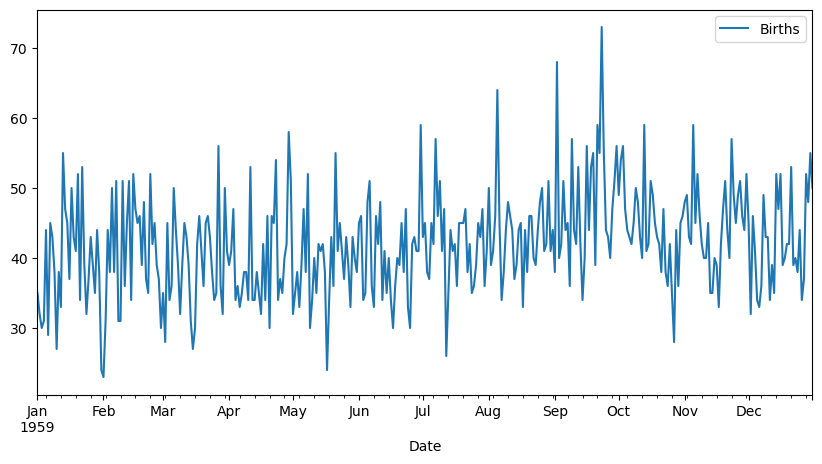

In [26]:
df_s.plot(figsize = (10, 5))

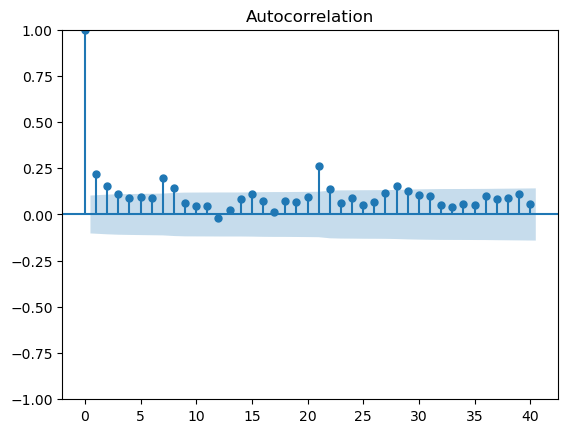

In [27]:
plot_acf(df_s, lags = 40);

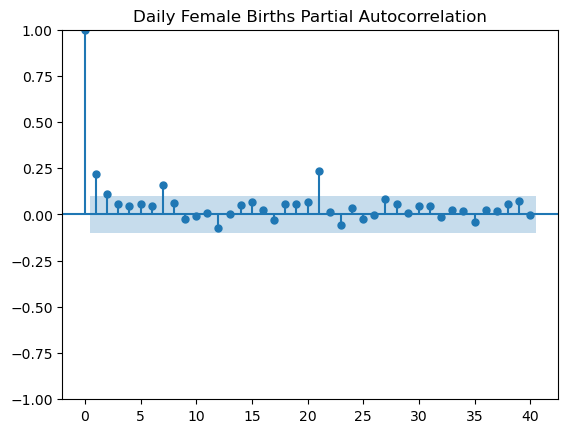

In [33]:
plot_pacf(df_s, lags = 40, title = 'Daily Female Births Partial Autocorrelation');

### Reading Plots to get ari and 